In [17]:
import pandas as pd

# Укажите путь к вашему CSV-файлу
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/pulsar_stars_new.csv'

# Чтение CSV-файла в DataFrame
df = pd.read_csv(csv_file_path)

# Фильтрация данных по столбцу MIP
filtered_df = df[(df['MIP'] >= 10) & (df['MIP'] <= 100)]

# Вывод числа строк в полученной выборке
num_rows = len(filtered_df)

print("Число строк в полученной выборке:", num_rows)

Число строк в полученной выборке: 4218


In [18]:
# Вычисление выборочного среднего для столбца MIP
mean_mip = filtered_df['MIP'].mean()

print("Выборочное среднее для столбца MIP:", mean_mip)

Выборочное среднее для столбца MIP: 77.0531927898293


In [19]:
# Определение минимального значения в столбце MIP
min_mip = filtered_df['MIP'].min()

print("Минимальное значение из столбца MIP:", min_mip)

Минимальное значение из столбца MIP: 10.0078125


In [20]:
from sklearn.model_selection import train_test_split

# Сортировка данных по столбцу SIP
sorted_df = filtered_df.sort_values('SIP')

# Разделение на обучающую и тестовую выборки с использованием стратификации
X = sorted_df.drop('TG', axis=1)  # Предикторы (все столбцы, кроме TG)
y = sorted_df['TG']  # Отклик (столбец TG)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=33)

# Определение максимального значения столбца SIP в тренировочной выборке
max_sip_train = X_train['STDC'].max()

print("Максимальное значение столбца SIP из тренировочной выборки:", max_sip_train)


Максимальное значение столбца SIP из тренировочной выборки: 109.6553451


In [21]:
from sklearn.preprocessing import MinMaxScaler

# Преобразование MinMax нормализации для тренировочного набора данных
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)

# Применение нормализации к тестовым данным
X_test_normalized = scaler.transform(X_test)

# Создание DataFrame для нормализованных данных
X_train_normalized_df = pd.DataFrame(X_train_normalized, columns=X_train.columns)

# Определение выборочного среднего для столбца STDC из тренировочной выборки после нормализации
mean_stdc_normalized = X_train_normalized_df['STDIP'].mean()

print("Выборочное среднее для столбца STDC из тренировочной выборки (после нормализации):", mean_stdc_normalized)


Выборочное среднее для столбца STDC из тренировочной выборки (после нормализации): 0.25572456092231716


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Обучение модели LogisticRegression на тренировочных данных
model = LogisticRegression()
model.fit(X_train_normalized, y_train)

# Оценка модели на тестовых данных
accuracy = model.score(X_test_normalized, y_test)

# Составление матрицы ошибок
y_pred = model.predict(X_test_normalized)
confusion = confusion_matrix(y_test, y_pred)

# Вывод матрицы ошибок
print("Матрица ошибок:")
print(confusion)

        #  Predicted Negative  Predicted Positive
# Actual Negative         TN                  FP
# Actual Positive         FN                  TP
# где:

# TN (True Negative) - количество верно предсказанных отрицательных классов.
# FP (False Positive) - количество неверно предсказанных положительных классов.
# FN (False Negative) - количество неверно предсказанных отрицательных классов.
# TP (True Positive) - количество верно предсказанных положительных классов.

# Ввод значения для True Positive (TP)
TP = confusion[1, 1]
print("True Positive (TP):", TP)


Матрица ошибок:
[[539  18]
 [ 41 246]]
True Positive (TP): 246


In [23]:
from sklearn.metrics import f1_score

# Вычисление F1-меры
f1 = f1_score(y_test, y_pred)

# Вывод F1-меры
print("F1 Score:", f1)

F1 Score: 0.8929219600725952


In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Обучение модели KNeighborsClassifier на тренировочных данных
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_normalized, y_train)

# Оценка модели на тестовых данных
accuracy = model.score(X_test_normalized, y_test)

# Составление матрицы ошибок
y_pred = model.predict(X_test_normalized)
confusion = confusion_matrix(y_test, y_pred)

# Вывод матрицы ошибок
print("Матрица ошибок:")
print(confusion)

# Ввод значения для True Positive (TP)
TP = confusion[1, 1]
print("True Positive (TP):", TP)

Матрица ошибок:
[[540  17]
 [ 29 258]]
True Positive (TP): 258


In [25]:
from sklearn.metrics import f1_score

# Вычисление F1-меры
f1 = f1_score(y_test, y_pred)

# Вывод F1-меры
print("F1 Score:", f1)

F1 Score: 0.918149466192171


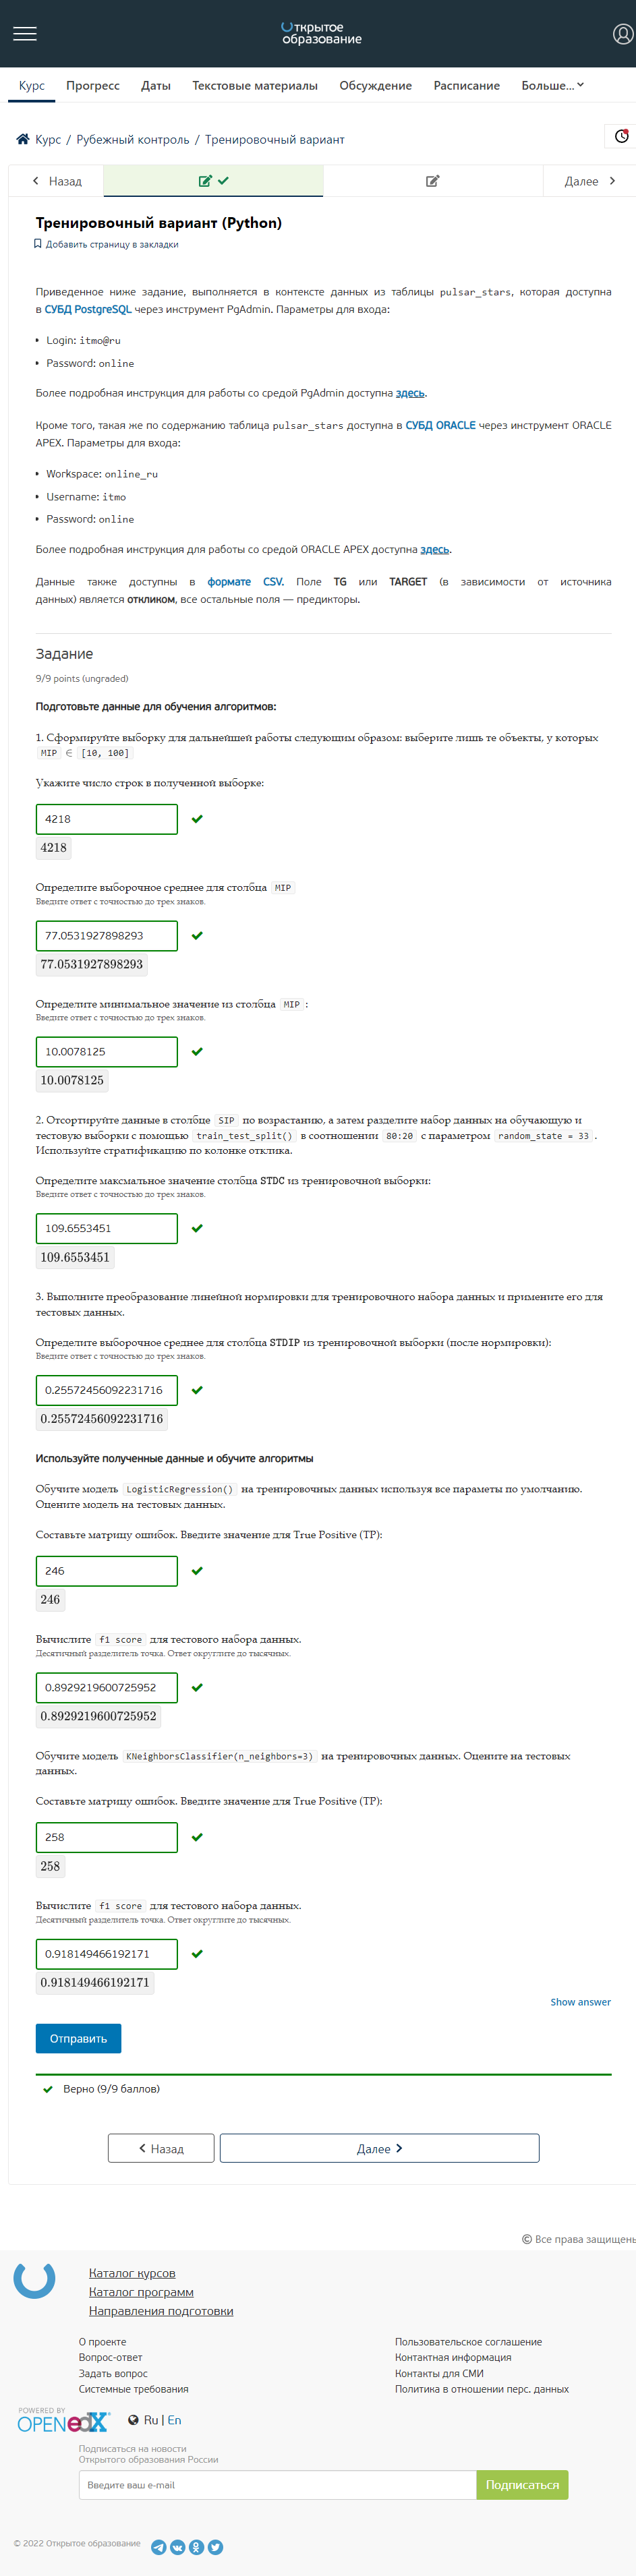